# Objective 1 : Audiences Preferrences
## 1.1 Analysis of the popularity movie genres in Box Office
To analyze the popularity of movie genres in the box office, we need to examine trends over time, considering factors like genre performance, audience preferences, and overall box office revenue.We will look at the audience preference by analysis of the vote count each genre.

## Dataset 
For this analysis we will look at the movie data set and movie review dataset.We will join the two datasets for ease of our analysis.



In [1]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import scipy.stats as stats
import statsmodels.api as sm
import pandas as pd
import sqlite3
import zipfile

In [10]:
Rating = pd.read_csv("C:/Users/Betty.Koila/Downloads/Group Work/Phase-2-Movie-project--Group-9/Collaborators/Betty/Data_1/rt.movie_info.tsv", sep='\t', quotechar='"')
Rating.head(5)

,id,synopsis,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,1,"This gritty, fast-paced, and innovative police...",R,Action and Adventure|Classics|Drama,William Friedkin,Ernest Tidyman,"Oct 9, 1971","Sep 25, 2001",NaN,NaN,104 minutes,NaN
1,3,"New York City, not-too-distant-future: Eric Pa...",R,Drama|Science Fiction and Fantasy,David Cronenberg,David Cronenberg|Don DeLillo,"Aug 17, 2012","Jan 1, 2013",$,"600,000",108 minutes,Entertainment One
2,5,Illeana Douglas delivers a superb performance ...,R,Drama|Musical and Performing Arts,Allison Anders,Allison Anders,"Sep 13, 1996","Apr 18, 2000",NaN,NaN,116 minutes,NaN
3,6,Michael Douglas runs afoul of a treacherous su...,R,Drama|Mystery and Suspense,Barry Levinson,Paul Attanasio|Michael Crichton,"Dec 9, 1994","Aug 27, 1997",NaN,NaN,128 minutes,NaN
4,7,NaN,NR,Drama|Romance,Rodney Bennett,Giles Cooper,NaN,NaN,NaN,NaN,200 minutes,NaN


In [15]:
Movie = pd.read_csv("C:/Users/Betty.Koila/Downloads/Group Work/Phase-2-Movie-project--Group-9/Collaborators/Betty/Data_1/tmdb.movies.csv")
Movie.head(5)

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


## Sample Dataset
### By merging the two dataset we are able to get a sample from the box office data to work with for our analysis and make inference on the movie genre preference.

In [20]:
Movies_merged = pd.merge(Movie, Rating, on='id', how='inner')
Movies_merged

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,PG-13,Comedy,Anthony Russo|Joe Russo,NaN,"Jul 13, 2006","Nov 21, 2006",$,"75,604,320",109 minutes,Universal Pictures
1,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,PG-13,Comedy,Anthony Russo|Joe Russo,NaN,"Jul 13, 2006","Nov 21, 2006",$,"75,604,320",109 minutes,Universal Pictures
2,10,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,...,R,Action and Adventure|Art House and Internation...,Harmony Korine,Harmony Korine,"Mar 22, 2013","Jul 9, 2013",$,"13,900,000",93 minutes,A24 Films
3,2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,...,R,Action and Adventure|Art House and Internation...,Harmony Korine,Harmony Korine,"Mar 22, 2013","Jul 9, 2013",$,"13,900,000",93 minutes,A24 Films
4,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films
5,43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,...,PG,Comedy|Horror,NaN,NaN,NaN,NaN,NaN,NaN,80 minutes,NaN
6,24000,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,...,PG,Comedy|Horror,NaN,NaN,NaN,NaN,NaN,NaN,80 minutes,NaN
7,117,"[18, 10402, 10749]",27,en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,...,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,120,[878],830,en,Forbidden Planet,10.274,1956-03-15,Forbidden Planet,7.3,388,...,R,Art House and International|Comedy|Drama|Roman...,Ang Lee,Ang Lee|James Schamus|Neil Peng,"Aug 4, 1993","Jun 15, 2004",NaN,NaN,111 minutes,NaN
9,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,...,R,Drama,Craig Brewer,Craig Brewer,"Mar 2, 2007","Jun 26, 2007",$,"9,262,318",115 minutes,Paramount Vantage


## Data Cleaning,Inspection and Processing

In [31]:
# we have to dropped the duplicate rows
Final_Movie_Data= Movies_merged.drop_duplicates()
Final_Movie_Data

,Unnamed: 0,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count,...,rating,genre,director,writer,theater_date,dvd_date,currency,box_office,runtime,studio
0,3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,PG-13,Comedy,Anthony Russo|Joe Russo,NaN,"Jul 13, 2006","Nov 21, 2006",$,"75,604,320",109 minutes,Universal Pictures
1,2473,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174,...,PG-13,Comedy,Anthony Russo|Joe Russo,NaN,"Jul 13, 2006","Nov 21, 2006",$,"75,604,320",109 minutes,Universal Pictures
2,10,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,...,R,Action and Adventure|Art House and Internation...,Harmony Korine,Harmony Korine,"Mar 22, 2013","Jul 9, 2013",$,"13,900,000",93 minutes,A24 Films
3,2477,"[16, 35, 10751]",863,en,Toy Story 2,22.698,1999-11-24,Toy Story 2,7.5,7553,...,R,Action and Adventure|Art House and Internation...,Harmony Korine,Harmony Korine,"Mar 22, 2013","Jul 9, 2013",$,"13,900,000",93 minutes,A24 Films
4,32,"[28, 53, 878, 12]",95,en,Armageddon,15.799,1998-07-01,Armageddon,6.7,4267,...,R,Drama|Sports and Fitness,Ben Younger,Ben Younger,"Nov 18, 2016","Feb 14, 2017",$,"5,051,927",116 minutes,Open Road Films
5,43,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,...,PG,Comedy|Horror,NaN,NaN,NaN,NaN,NaN,NaN,80 minutes,NaN
6,24000,"[35, 10749]",239,en,Some Like It Hot,14.200,1959-03-18,Some Like It Hot,8.2,1562,...,PG,Comedy|Horror,NaN,NaN,NaN,NaN,NaN,NaN,80 minutes,NaN
7,117,"[18, 10402, 10749]",27,en,9 Songs,10.332,2004-09-09,9 Songs,4.9,170,...,NR,Musical and Performing Arts,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,120,[878],830,en,Forbidden Planet,10.274,1956-03-15,Forbidden Planet,7.3,388,...,R,Art House and International|Comedy|Drama|Roman...,Ang Lee,Ang Lee|James Schamus|Neil Peng,"Aug 4, 1993","Jun 15, 2004",NaN,NaN,111 minutes,NaN
9,2470,"[12, 28, 14]",1865,en,Pirates of the Caribbean: On Stranger Tides,30.579,2011-05-20,Pirates of the Caribbean: On Stranger Tides,6.4,8571,...,R,Drama,Craig Brewer,Craig Brewer,"Mar 2, 2007","Jun 26, 2007",$,"9,262,318",115 minutes,Paramount Vantage


### Data Understanding

Each record (row) in this dataset represents genre of movies that were aired on box office.

Each feature (column) in this dataset is some attribute of the movies.

We are going to focus on the following features:

**id**: `The movies Id for our sampled data of box office users`

**genre**: `The movies genre or type that are popular among box office users`

**vote_count**: `The number of individual votes or ratings that a movie has received from viewers.Total number of people who have rated the movie`

**vote_average**: ` average rating given to a movie by viewers from a scale of 0 to 10`

**popularity**: `The percentage of how the movies are popular among box office users`

In [34]:
# From Final_Movie_Data DataFrame we select the specific columns to be analysed
Selected_Columns = ['id','genre', 'vote_average', 'vote_count', 'popularity']

Selected_Columns= Final_Movie_Data[selected_columns]

# Display the selected data
Selected_Columns.head(10)




,id,genre,vote_average,vote_count,popularity
0,862,Comedy,7.9,10174,28.005
1,862,Comedy,7.9,10174,28.005
2,863,Action and Adventure|Art House and Internation...,7.5,7553,22.698
3,863,Action and Adventure|Art House and Internation...,7.5,7553,22.698
4,95,Drama|Sports and Fitness,6.7,4267,15.799
5,239,Comedy|Horror,8.2,1562,14.200
6,239,Comedy|Horror,8.2,1562,14.200
7,27,Musical and Performing Arts,4.9,170,10.332
8,830,Art House and International|Comedy|Drama|Roman...,7.3,388,10.274
9,1865,Drama,6.4,8571,30.579


In [35]:
Selected_Columns.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 32 entries, 0 to 31
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   id            32 non-null     int64  
 1   genre         32 non-null     object 
 2   vote_average  32 non-null     float64
 3   vote_count    32 non-null     int64  
 4   popularity    32 non-null     float64
dtypes: float64(2), int64(2), object(1)
memory usage: 1.5+ KB


## Pearson Correlations

To understand more about what features of these movies genre that lead to them getting more popular, let's look at some correlations.

We'll only check the correlations with some kind of numeric data type.

### Exploring Correlations

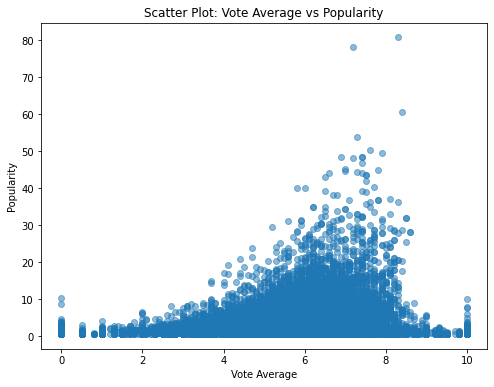

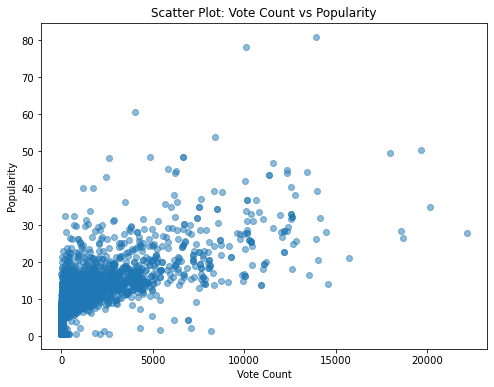

In [37]:
# Plot 'vote_average' vs 'popularity'
plt.figure(figsize=(8, 6))
plt.scatter(Movie['vote_average'], Movie['popularity'], alpha=0.5)
plt.xlabel('Vote Average')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Vote Average vs Popularity')
plt.show()

# Plot 'vote_count' vs 'popularity'
plt.figure(figsize=(8, 6))
plt.scatter(Movie['vote_count'], Movie['popularity'], alpha=0.5)
plt.xlabel('Vote Count')
plt.ylabel('Popularity')
plt.title('Scatter Plot: Vote Count vs Popularity')
plt.show()


In [38]:
# Calculating Pearson correlation coefficient
correlation = Movie['vote_average'].corr(Movie['popularity'])
correlation = Movie['vote_count'].corr(Movie['popularity'])

# Result
print(f"Pearson Correlation between 'vote_average' and 'popularity': {correlation}")
print(f"Pearson correlation between 'vote_count' and 'popularity': {correlation}")



Pearson Correlation between 'vote_average' and 'popularity': 0.69484937103337
Pearson correlation between 'vote_count' and 'popularity': 0.69484937103337


**Correlation Value** : A Pearson correlation of **0.695** is generally considered a modrately strong positive correlation. This suggests that there is a reasonably strong linear relationship between each pair of variables (vote_average and popularity, vote_count and popularity).

*vote_average vs popularity* : Movies that are rated highly by viewers (with a higher average vote) are likely to be more popular. However, a high average rating alone doesn't guarantee popularity—other factors like marketing, genre, and distribution can influence how popular a movie becomes.


*vote_count vs popularity* : A higher number of votes (suggesting more audience engagement) generally correlates with greater popularity. This makes sense because more votes often indicate a wider audience, which is usually linked to higher popularity.

# Statistical analysis using ANOVA


**Descriptive Statistics by Genre**

We compute the summary statistics (mean, median, standard deviation) of vote counts for each genre to get an overview of how popularity differs across genres.

To compare the top 10 most popular genres with popularity statistically, we can break it down into a few steps:

Identify the top 10 most popular genres based on the vote counts of movies in each genre.
Calculate descriptive statistics (e.g., mean, median, standard deviation) for the popularity of each of these top genres.
Optionally, you can visualize the data (e.g., with boxplots or bar plots).

In [58]:
# Group by genre and calculate the sum of vote count for each genre
Genre_popularity = Selected_Columns.groupby('genre')['vote_count'].sum()

# Sort genres by popularity in ascending order and select the top 10
Top_10_genres = Genre_popularity.sort_values(ascending=False).head(10)

# Display the top 10 most popular genres
Top_10_genres.head(10)

genre
Comedy                                                                                  26112
Action and Adventure|Art House and International|Comedy|Cult Movies|Drama               15106
Art House and International                                                             13364
Action and Adventure|Drama                                                              12810
Action and Adventure|Art House and International|Classics|Drama|Mystery and Suspense    10411
Drama                                                                                    9362
Drama|Sports and Fitness                                                                 4267
Comedy|Horror                                                                            3124
Action and Adventure|Science Fiction and Fantasy                                         3015
Drama|Horror|Science Fiction and Fantasy                                                 2622
Name: vote_count, dtype: int64

## Bar Plot (Average Popularity per Genre):

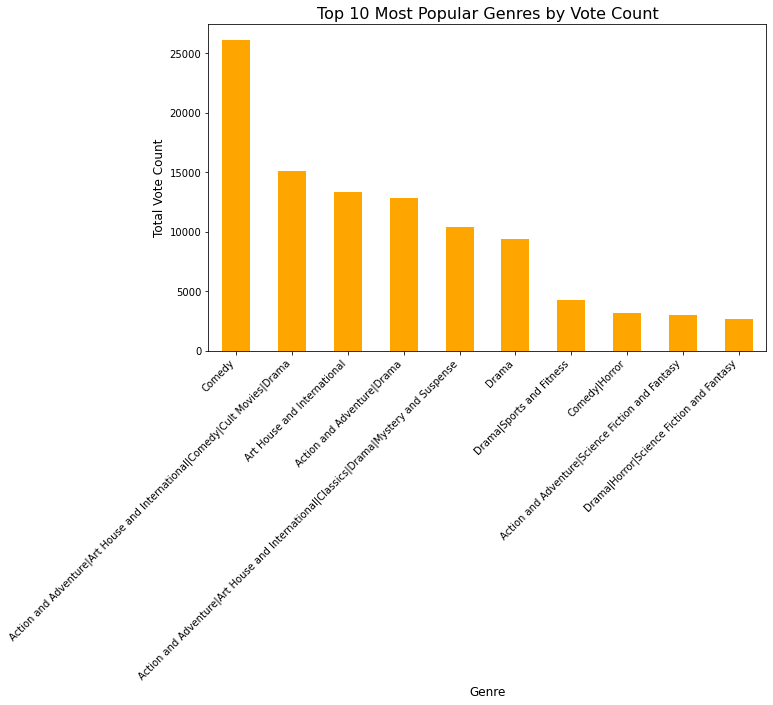

In [68]:
# Plot the top 10 genres as a bar chart
plt.figure(figsize=(10, 6))  # Adjust the figure size if needed
Top_10_genres.plot(kind='bar',color='orange')

# Adding labels and title
plt.title('Top 10 Most Popular Genres by Vote Count', fontsize=16)
plt.xlabel('Genre', fontsize=12)
plt.ylabel('Total Vote Count', fontsize=12)

# Optional: Rotate x-axis labels for better readability
plt.xticks(rotation=45, ha='right')

# Show the plot
plt.show()

## Statistical Testing
We conduct a statistical test, to statistically test whether the differences in popularity between these top 10 genres are significant, you could perform an ANOVA (Analysis of Variance). This will determine if the mean popularity differs significantly across the top 10 genres.

## Hypothesis 
**Null Hypothesis** : There is no significant difference in the mean popularity (vote count) between the top 10 genres.

**Alternative Hypothesis**:At least one genre has a significantly different mean popularity (vote count) compared to the others.

Significance level at **5%**

In [ ]:

# Filter the dataset to include only the top 10 genres
top_genre_names = Top_10_genres.index
top_genre_data = Selected_Columns[Selected_Columns['genre'].isin(top_genre_names)]

# Perform ANOVA
# Group the data by 'genre' and apply the vote_count to each group
groups = [top_genre_data[top_genre_data['genre'] == genre]['vote_count'] for genre in top_genre_names]

# Perform one-way ANOVA to test for significant differences between genres
f_statistic, p_value = stats.f_oneway(*groups)

# Print the results
print(f"F-statistic: {f_statistic}")
print(f"P-value: {p_value}")

# Interpret the result
alpha = 0.05  # Significance level (5%)
if p_value < alpha:
    print("Reject the null hypothesis: There are significant differences between genres.")
else:
    print("Fail to reject the null hypothesis: There are no significant differences between genres.")


F-statistic: 2.4368911893055367
P-value: 0.12667047862063385
Fail to reject the null hypothesis: There are no significant differences between genres.


## Conclusion

Since the p-value is larger than the significance level of 0.05, we do not have enough evidence to reject the null hypothesis.Therefore,we conclude that there are no statistically significant differences in the mean vote counts between the top 10 genres based on the analysis.